In [1]:
import numpy as np
from scipy.stats import levy_stable
import scipy
import math
import random
import levy
from matplotlib import pyplot

In [162]:
def create_seascape_uniform(seascape_length, seascape_width, patches):
    patch_count = len(patches)
    patch_length = len(patches[0])
    if(seascape_length % patch_length != 0 or seascape_width % patch_length !=0):
        raise Exception("Seascape length and width must both be dividable by patch length")
    seascape = np.zeros((seascape_length, seascape_width))
    x = random.randint(0, seascape_width-100) #Initial patch placements
    y = random.randint(0, seascape_length-100)
    for patch in patches:
        #print(patch.shape, x, y)
        y2 = 0
        for y1 in range(y, y + patch_length): #This is to replace the values with the values generated from the patch generator
            x2 = 0
            for x1 in range(x, x+patch_length):
                if(x1 >= seascape_width): #Torus properties
                    x1 -= seascape_width
                if(y1 >= seascape_length):
                    y1 -= seascape_length
                seascape[y1][x1] = seascape[y1][x1] + patch[y2][x2] #Update cell value
                x2+=1
            y2+=1
        ang = random.randint(-360,360)
        step = np.random.uniform(low=1, high=seascape_length)
        step *= np.random.choice([1,-1], p=[.5,.5]) 
        xstep = int(step * math.cos(math.radians(ang)))
        ystep = int(step * math.sin(math.radians(ang)))
        newposy = int(y + ystep)
        newposx = int(x + xstep)
        if(newposy >= seascape_length - 1):
            newposy = newposy - seascape_length - 1
        if(newposy < 0):
            newposy = newposy + seascape_length - 1
        if(newposx >= seascape_width - 1):
            newposx = newposx - seascape_width - 1
        if(newposx < 0):
            newposx = newposx + seascape_width - 1
        y = newposy
        x = newposx
        #print(seascape)
    return seascape

def create_seascape_levy_1(seascape_length, seascape_width, patches):
    patch_count = len(patches)
    patch_length = len(patches[0])
    if(seascape_length % patch_length != 0 or seascape_width % patch_length !=0):
        raise Exception("Seascape length and width must both be dividable by patch length")
    seascape = np.zeros((seascape_length, seascape_width))
    x = random.randint(0, seascape_width-1)
    y = random.randint(0, seascape_length-1)
    a = np.array(range(50,2500))
    prob = levy.levy(a, 1, 0)
    stepsorig = [random.choices(a, weights=prob) for x in range(patch_count)]
    steps = [np.random.choice([1,-1], p=[.5,.5]) * x[0] for x in stepsorig]
    print(steps)
    for patch in patches:
        #print(patch.shape, x, y)
        y2 = 0
        for y1 in range(y, y + patch_length): #This is to replace the values with the values generated from the patch generator
            x2 = 0
            for x1 in range(x, x+patch_length):
                if(x1 >= seascape_width): #Torus properties
                    x1 -= seascape_width
                if(y1 >= seascape_length):
                    y1 -= seascape_length
                seascape[y1][x1] = seascape[y1][x1] + patch[y2][x2] #Update cell value
                x2+=1
            y2+=1
        ang = random.randint(-360,360)
        xstep = int(steps[i] * math.cos(math.radians(ang)))
        ystep = int(steps[i] * math.sin(math.radians(ang)))
        newposy = int(y + ystep)
        newposx = int(x + xstep)
        if(newposy >= seascape_length - 1):
            newposy = newposy - seascape_length - 1
        if(newposy < 0):
            newposy = newposy + seascape_length - 1
        if(newposx >= seascape_width - 1):
            newposx = newposx - seascape_width - 1
        if(newposx < 0):
            newposx = newposx + seascape_width - 1
        y = newposy
        x = newposx
        #print(seascape)
    return seascape
    
def create_seascape_levy_2(seascape_length, seascape_width, patches):
    patch_count = len(patches)
    patch_length = len(patches[0])
    if(seascape_length % patch_length != 0 or seascape_width % patch_length !=0):
        raise Exception("Seascape length and width must both be dividable by patch length")
    seascape = np.zeros((seascape_length, seascape_width))
    x = random.randint(0, seascape_width-1)
    y = random.randint(0, seascape_length-1)
    i=0
    a = np.array(range(1,2500))
    prob = levy.levy(a, 1, 0, sigma=200)
    steps = [random.choices(a, weights=prob) for x in range(patch_count)]
    positions=[]
    #steps = [np.random.choice([1,-1], p=[.5,.5]) * x[0] for x in stepsorig]
    #print(steps)
    #print(steps)
    for patch in patches:
        #print(patch.shape, x, y)
        y2 = 0
        for y1 in range(y, y + patch_length): #This is to replace the values with the values generated from the patch generator
            x2 = 0
            for x1 in range(x, x+patch_length):
                if(x1 >= seascape_width): #Torus properties
                    x1 -= seascape_width
                if(y1 >= seascape_length):
                    y1 -= seascape_length
                seascape[y1][x1] = seascape[y1][x1] + patch[y2][x2] #Update cell value
                x2+=1
            y2+=1
        ang = random.randint(-360,360)
        xstep = int(steps[i][0] * math.cos(math.radians(ang)))
        ystep = int(steps[i][0] * math.sin(math.radians(ang)))
        newposy = int(y + ystep)
        newposx = int(x + xstep)
        #print((xstep,ystep),(newposx,newposy), steps[i][0])
        if(newposy >= seascape_length - 1):
            newposy = newposy - seascape_length - 1
        if(newposy < 0):
            newposy = newposy + seascape_length - 1
        if(newposx >= seascape_width - 1):
            newposx = newposx - seascape_width - 1
        if(newposx < 0):
            newposx = newposx + seascape_width - 1
        y = newposy
        x = newposx
        i+=1
        #print(seascape)
        
    #print(positions)
    return seascape
    
def generate_patch(patch_length):
    patch = np.zeros((patch_length,patch_length))
    req_area = (patch_length**2)
    big_l = int(req_area**.5)
    hit = 0
    while(hit < req_area):
        pos=(50,50)
        l = big_l
        a = np.array(np.concatenate((range(int(-patch_length/4),0), range(0,int(patch_length/4))))) #concat range of min and max values + and -
        prob = scipy.stats.norm(0, 7).pdf(np.concatenate((range(int(-patch_length/4),0), range(0,int(patch_length/4))))) #get probability distribution for walk
        xsteps = [random.choices(a, weights=prob) for x in range(big_l)] #get x displacement
        ysteps = [random.choices(a, weights=prob) for y in range(big_l)] #get y displacement
        for i in range(big_l):
            newposy = int(pos[0] + ysteps[i][0])
            newposx = int(pos[1] + xsteps[i][0])
            if(newposy >= 100):
                newposy = newposy - 100
            elif(newposy < 0):
                newposy = newposy + 100
            if(newposx >= 100):
                newposx = newposx - 100
            elif(newposx < 0):
                newposx = newposx + 100
            pos = (newposy, newposx)
            if(patch[pos[0]][pos[1]] == 0):
                patch[pos[0]][pos[1]] = l
                hit += 1
            l -= 1
    return patch
        
def reward(levy_sea, walk):
    reward = 0
    while(True):
        pos=np.random.randint(len(levy_sea))
        for x in range(len(walk)):
            if(walk[x] < 0):
                for y in range(walk[x], 0):
                    reward += levy_sea[pos][x]
                    pos-=1
                    if(pos<0):
                        pos+=2500
            else:
                for y in range(walk[x]):
                    reward += levy_sea[pos][x]
                    pos+=1
                    if(pos >= 2500):
                        pos-=2500
        if(reward >= 0):
            break;
    return reward

def random_walk(N):
    stepsorig = np.random.randint(1, 14, size=N)
    steps = [np.random.choice([1,-1], p=[.5,.5]) * x for x in stepsorig]
    #print(len(steps))
    return steps
            
def levy_walk(N):
    a = np.array(range(1,2500))
    prob = levy.levy(a, 1, 0)
    stepsorig = [random.choices(a, weights=prob) for x in range(N)]
    steps = [np.random.choice([1,-1], p=[.5,.5]) * x[0] for x in stepsorig]
    #print(len(steps))
    return  steps
        
def walk_to_position(random_walk): #This function takes a random walk as it's parameter, and returns a torus bouded positon list
    pos=[]
    for i in range(len(random_walk)):
        if(i == 0): #First position is a random depth
            y = random_walk[i]
            if(y >= 2500): #Torus
                y -= 2500
            if(y < 0):#Torus
                y+=2500
            pos.append(y)#Add Initial position
        else:
            y = random_walk[i] + pos[i-1]
            if(y >= 2500):
                y -= 2500
            if(y < 0):
                y+=2500
            pos.append(y)
    return pos
    
def generate_seascapes_random(scope, patches):
    seascapes = []
    for i in range(scope):
        seascape_uniform = create_seascape_uniform(2500,5000, patches)
        seascapes.append(seascape_uniform)
    return seascapes

def generate_seascapes_levy(scope, patches):
    seascapes_ll = []
    for i in range(scope):
        seascape_levy = create_seascape_levy_2(2500,5000, patches)
        seascapes_ll.append(seascape_levy)
    return seascapes_ll
        
def generate_random_walks(scope, step_count):
    walks = []
    positions = []
    for i in range(scope):
        steps = random_walk(step_count)
        walks.append(steps)
        positions.append(walk_to_position(steps))
    return walks, positions

def generate_levy_walks(scope, step_count):
    walks = []
    positions = []
    for i in range(scope):
        steps = levy_walk(step_count)
        walks.append(steps)
        positions.append(walk_to_position(steps))
    return walks, positions

def get_consumptions(seascapes, walks):
    arr_consumption = []
    for seascape in seascapes:
        for walk in walks:
            consumption = reward(seascape, walk)
            arr_consumption.append(consumption/np.sum(np.abs(walk)))
    return arr_consumption

In [361]:
def find_upper_uniform_bound(walks_levy):
    diffarr = []
    print("Levy_walk length: " + str(np.sum(np.abs(walks_levy))))
    best_diff = 99999999
    best_index = 0
    for p in range(10,25):
        walks_random = []
        for i in range(len(walks_levy)):
            steps_r = np.random.randint(1, p, size=5000)
            walks_random.append(steps_r)
        print(np.sum(np.abs(walks_random)))
        diff= np.sum(np.abs(walks_levy)) - np.sum(np.abs(walks_random))
        if(abs(diff) < best_diff):
            best_diff = diff
            best_index = p
        diffarr.append(diff)
    return best_index, diffarr, best_diff

In [163]:
patches = [generate_patch(100) for x in range(50)]
print("patches")
levy_seascapes = generate_seascapes_levy(10, patches)
print("1 done")
levy_walks, levy_positions = generate_levy_walks(1000,5000)
print("2 done")

random_seascapes = generate_seascapes_random(10, patches)
print("3 done")
random_walks, random_positions = generate_random_walks(1000,5000)
print("4 done")

arr_consumption_new_ll = get_consumptions(levy_seascapes, levy_walks)
print("5")
arr_consumption_new_lr = get_consumptions(random_seascapes, levy_walks)
print("6")
arr_consumption_new_rl = get_consumptions(levy_seascapes, random_walks)
print(7)
arr_consumption_new_rr = get_consumptions(random_seascapes, random_walks)

1 done
0
100
200
300
400
500
600
700
800
900
2 done
3 done
4 done
5
6
7


Mean: 1.9826037583989098
Median: 1.7998705726639321


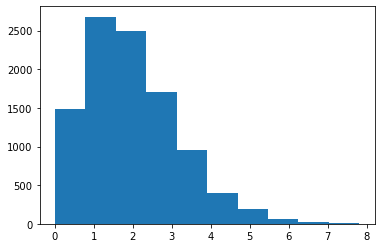

In [177]:
pyplot.hist(arr_consumption_new_ll)
pyplot.savefig('hist_LL.jpg')
print("Mean: " + str(np.mean(arr_consumption_new_ll)))
print("Median: " + str(np.median(arr_consumption_new_ll)))

Mean: 1.959431546716985
Median: 1.905641904763724


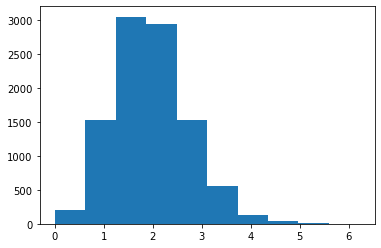

In [168]:
pyplot.hist(arr_consumption_new_lr)
pyplot.savefig('hist_LR.jpg')
print("Mean: " + str(np.mean(arr_consumption_new_lr)))
print("Median: " + str(np.median(arr_consumption_new_lr)))

Mean: 1.9444947839338422
Median: 1.4030952331347815


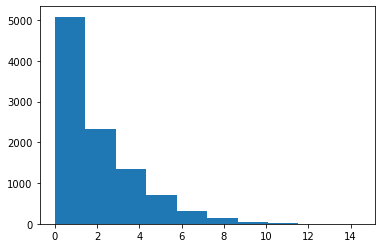

In [169]:
pyplot.hist(arr_consumption_new_rl)
pyplot.savefig('hist_RL.jpg')
print("Mean: " + str(np.mean(arr_consumption_new_rl)))
print("Median: " + str(np.median(arr_consumption_new_rl)))

Mean: 1.9662044056633265
Median: 1.8414353938774988


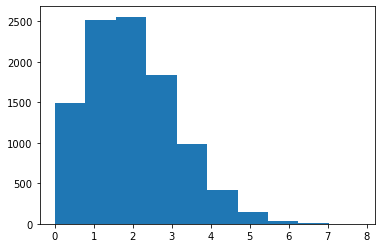

In [170]:
pyplot.hist(arr_consumption_new_rr)
pyplot.savefig('hist_RR.jpg')
print("Mean: " + str(np.mean(arr_consumption_new_rr)))
print("Median: " + str(np.median(arr_consumption_new_rr)))

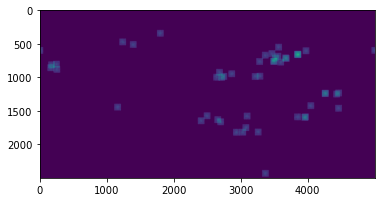

In [221]:
#seascapes_a = create_seascape_levy_2(2500,5000, patches)
pyplot.imshow(levy_seascapes[2])
#pyplot.savefig('levy_seascape.jpg')

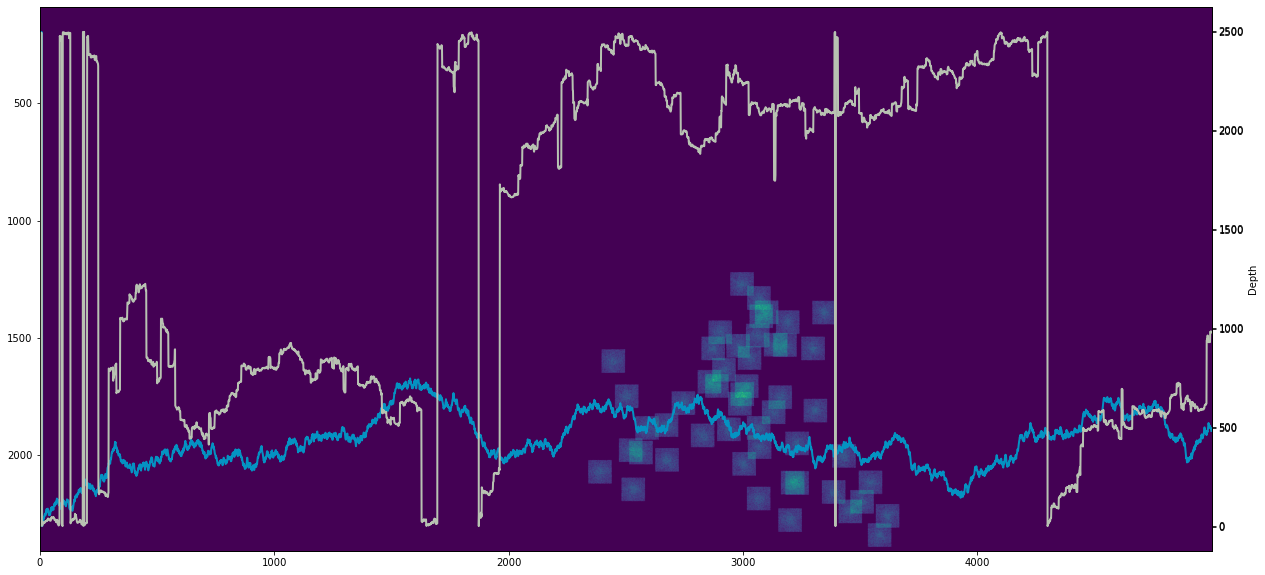

In [347]:
fig, ax1 = pyplot.subplots(figsize=(21, 10))
ax2 = ax1.twinx() 
ax3 = ax1.twinx() 
pyplot.xlabel("Time Step")
pyplot.ylabel("Depth")
ax1.imshow(levy_seascapes[5])
ax2.plot(random_positions[2], lw=2, color='#0492C2')
ax3.plot(levy_positions[2], lw=2, color='#B8C2B2')
#print(reward(seascapes[1], randomwalk), reward(seascapes_ll[3], levywalk))
pyplot.show()

In [206]:
patches_graph = [generate_patch(100) for x in range(5)]


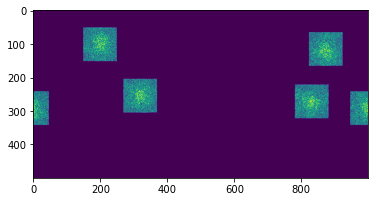

In [210]:
seascape_graph = create_seascape_uniform(500,1000,patches_graph)
pyplot.imshow(seascape_graph)